# Intro to Scientific Programming
By G Hosseinzadeh 2025 Apr 15

Let's imagine you want to generate synthetic spectra of different types of stars. The figure below shows approximate temperature and radius ranges for each type. In reality they have some absorption lines (shown at left), but for now let's approximate them as perfect blackbody emitters.

![main sequence stars](https://upload.wikimedia.org/wikipedia/commons/3/37/Stellar_Classification_Chart.png)  
Credit: Pablo Carlos Budassi (Wikimedia.org)

The Planck function gives the spectral radiance $(B_\lambda \equiv \frac{dE}{dt\,d\lambda\,dA\,d\Omega})$ of the stellar photosphere for a given temperature:
$$B_\lambda = \frac{2 h c^2}{\lambda^5} \frac{1}{\exp\left(\frac{h c}{\lambda k_B T}\right) - 1}$$

Spectral flux $(F_\lambda \equiv \frac{dE}{dt\,d\lambda\,dA})$ is the integral of the component of the spectral radiance **in the direction of the observer** $(\cos\theta)$:
$$F_\lambda = \iint B_\lambda \cos\theta \,d\Omega = B_\lambda \int_0^{2\pi} \int_0^{\pi/2} \cos\theta \sin\theta \,d\theta \,d\phi = \pi B_\lambda$$

Spectral luminosity $(L_\lambda \equiv \frac{dE}{dt\,d\lambda})$ is the integral over the surface area of the stellar photosphere:
$$L_\lambda = \iint F_\lambda \,dA = F_\lambda \int_0^{2\pi} \int_{0}^{\pi} R^2 \sin\theta \,d\theta \,d\phi = 4 \pi R^2 F_\lambda$$

Put that all together:
$$L_\lambda = \frac{8 \pi^2 R^2 h c^2}{\lambda^5} \frac{1}{\exp\left(\frac{h c}{\lambda k_B T}\right) - 1}$$


This gives you the spectral luminosity as a function of wavelength $\lambda$ for a star with temperature $T$ and radius $R$. We're going to implement this equation in Python in three different ways:
* using only the built-in math module (this contains the constant $\pi$ and the exponential function)
* using NumPy arrays
* using Astropy quantities

Then calculate spectra for each of the 7 classes of stars (OBAFGKM). In each case, plot the resulting spectra ($L_\lambda$ vs. $\lambda$) to check your work. (Hint: a logarithmic $y$-axis might help.)

In [204]:
import matplotlib.pyplot as plt  # we'll learn more about this next time; for now just use plt.plot(x, y)
import math 

## Using only the built-in math module

In [205]:
# physical constants
R_SUN = 6.96e8  # m
C_LIGHT = 3.00e8  # m / s
H_PLANCK = 6.63e-34  # J / Hz
K_BOLTZMANN = 1.38e-23  # J / K
pi = math.pi

In [206]:
wavelengths =  [400E-9, 440E-9, 480E-9, 520E-9, 560E-9, 600E-9, 640E-9 ] #in meters 
more_wavelengths = 
temperatures =  [2100, 3400, 4900, 5700, 7200, 9700,30000] #in Celsius
radii = [0.7, 0.8, 1, 1.25, 1.6, 4.2, 6.6]  #in Solar mass 

def temp_to_kelvin(temp):#turns celsius to kelvin
    lst = []
    for temperature in temperatures:
        convert = temperature + 273
        lst.append(convert)
    return lst
    
converted_temps = temp_to_kelvin(temperatures)
#print(converted_temps)

def solar_radii_to_meters(radius):#turns solar radii to meters
    lst = []
    for radii in radius:
        convert = radii * (6.957*(10**8))
        lst.append(convert)
    return lst

converted_radii = solar_radii_to_meters(radii)
#print(converted_radii)

In [207]:
%%timeit

def spectral_luminosity(wavelength, temp, radii):
    lst = []
    for y in range(len(wavelength)):
        t = temp[y]
        r = radii[y]
        for x in range(len(wavelength)):
            first_top_fract =(8*(pi**2)*(r**2)*H_PLANCK*(C_LIGHT**2))
            first_bot_fract = (wavelengths[x])**5
            second_bot_fract = (math.exp((H_PLANCK*C_LIGHT)/(wavelengths[x]*K_BOLTZMANN*t))-1)
            total = first_top_fract/first_bot_fract *(1/second_bot_fract)
            lst.append(total)
    return lst

# spectral_L =spectral_luminosity(
#     wavelengths,converted_temps, converted_radii
# )

# #print(spectral_L)

49.6 ns ± 0.739 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


Text(0, 0.5, 'Spectral Luminosity')

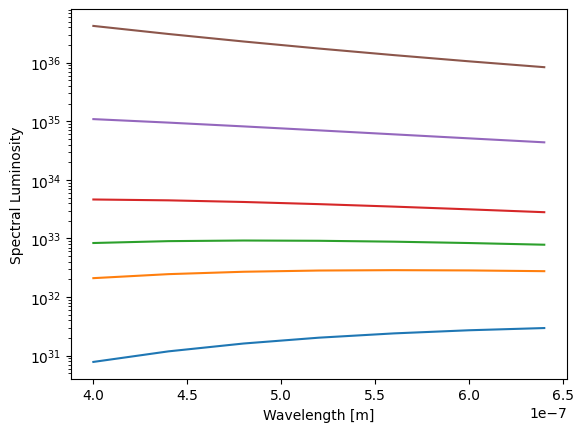

In [208]:
# plot thplt.plot(wavelengths,spectral_L[0:7])
plt.plot(wavelengths,spectral_L[7:14])
plt.plot(wavelengths,spectral_L[14:21])
plt.plot(wavelengths,spectral_L[21:28])
plt.plot(wavelengths,spectral_L[28:35])
plt.plot(wavelengths,spectral_L[35:42])
plt.plot(wavelengths,spectral_L[42:49])

plt.yscale("log")
plt.xlabel("Wavelength [m]")
plt.ylabel("Spectral Luminosity")


## Now with NumPy Arrays

In [209]:
import numpy as np

In [210]:
np_wavelengths =  np.array(wavelengths)# complete with numpy array
np_converted_temperatures = np.array(converted_temps)  # complete with numpy array
np_converted_radii = np.array(converted_radii) # complete with numpy array

In [212]:
%%timeit
def np_spectral_luminosity(wavelength, temp, radii):
    lst=[]
    for x in range(len(wavelength)):
        t = temp[x]
        r = radii[x]
        first_top_fract =(8*(np.pi**2)*(r**2)*H_PLANCK*(C_LIGHT**2))
        first_bot_fract = wavelength**5
        second_bot_fract = (np.exp((H_PLANCK*C_LIGHT)/(wavelength*K_BOLTZMANN*t))-1)
        total = first_top_fract/first_bot_fract *(1/second_bot_fract)
        lst.append(total)
    return lst

# np_spectral_L = np_spectral_luminosity(
#     np_wavelengths,np_converted_temperatures, np_converted_radii
# )
#print(np_spectral_L)

52.8 ns ± 0.334 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


Text(0, 0.5, 'Spectral Luminosity')

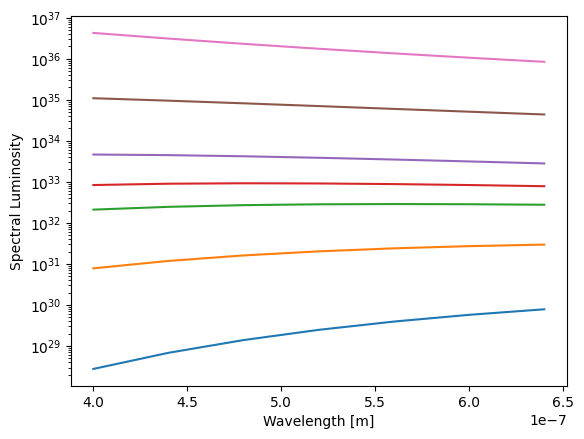

In [213]:
plt.plot(np_wavelengths,np_spectral_L[0])
plt.plot(np_wavelengths,np_spectral_L[1])
plt.plot(np_wavelengths,np_spectral_L[2])
plt.plot(np_wavelengths,np_spectral_L[3])
plt.plot(np_wavelengths,np_spectral_L[4])
plt.plot(np_wavelengths,np_spectral_L[5])
plt.plot(np_wavelengths,np_spectral_L[6])

plt.yscale("log")
plt.xlabel("Wavelength [m]")
plt.ylabel("Spectral Luminosity")


## Now with Astropy Quantities

In [214]:
from astropy import units as u
from astropy import constants as const
from astropy.visualization import quantity_support
quantity_support()  

<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x27c92b6f280>

In [215]:
astro_wavelengths = np_wavelengths * u.m # complete with astropy quantity
astro_temperatures = np_converted_temperatures * u.K  # complete with astropy quantity
astro_radii = np_converted_radii * u.m  # complete with astropy quantity
# physical constants
astro_R_SUN = 6.96e8 * u.m  # m
astro_C_LIGHT = 3.00e8 * u.m / u.s # m / s
astro_H_PLANCK = 6.63e-34 * u.J / u.Hz  # J / Hz
astro_K_BOLTZMANN = 1.38e-23 * u.J / u.K  # J / K


In [216]:
%%timeit
def astro_np_spectral_luminosity(wavelength, temp, radii):
    lst=[]
    for x in range(len(wavelength)):
        t = temp[x]
        r = radii[x]
        first_top_fract =(8 * (np.pi**2) * (r**2) * astro_H_PLANCK * (astro_C_LIGHT**2))
        first_bot_fract = wavelength**5
        second_bot_fract = np.exp((astro_H_PLANCK*astro_C_LIGHT)/(wavelength*astro_K_BOLTZMANN*t))-1
        total = first_top_fract/first_bot_fract *(1/second_bot_fract)
        lst.append(total)
    return lst

# astro_np_spectral_L = astro_np_spectral_luminosity(
#     astro_wavelengths, astro_temperatures, astro_radii
# )
# #print(astro_np_spectral_L)

48.9 ns ± 0.947 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


Text(0, 0.5, 'Spectral Luminosity')

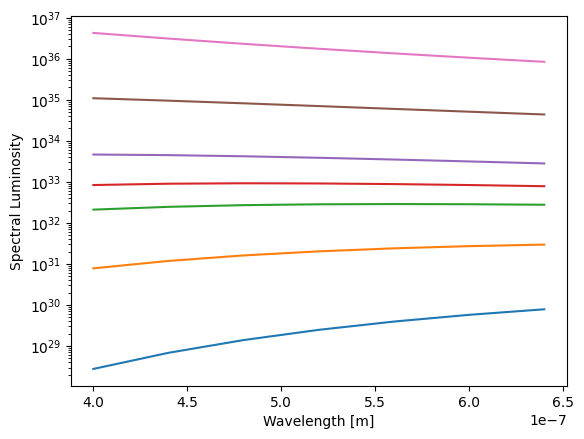

In [197]:
plt.plot(astro_wavelengths, astro_np_spectral_L[0])
plt.plot(astro_wavelengths, astro_np_spectral_L[1])
plt.plot(astro_wavelengths, astro_np_spectral_L[2])
plt.plot(astro_wavelengths, astro_np_spectral_L[3])
plt.plot(astro_wavelengths, astro_np_spectral_L[4])
plt.plot(astro_wavelengths, astro_np_spectral_L[5])
plt.plot(astro_wavelengths, astro_np_spectral_L[6])

plt.yscale("log")
plt.xlabel("Wavelength [m]")
plt.ylabel("Spectral Luminosity")

## Compare the performance of these three methods
Add the `%%timeit` magic command at the top of each calculation cell to see how long it takes to run. Which is fastest? Which is most convenient?

Now increase the number of wavelength samples you are using by a factor of 10. How does this change your timing results?

In reality, which one would you use if you had to do this calculation for 7 stars? Which one would you use if you had to do this calculation for a billion stars (the size of the Gaia catalog)?

(Write your answers here.)

## Save your results using an Astropy Table

In [147]:
from astropy.table import Table

In [148]:
table =  # create an astropy table containing your results
table  # look at the results

SyntaxError: invalid syntax (756543762.py, line 1)

In [ ]:
# save your table to a file on your hard drive

In [ ]:
table2 =  # read in the file you just saved
table2  # look at the results